# Data Visualization

### imports

hier werden die Module geladen

In [2]:
from audio_segmentation.concat_audio import produce_final_audio
from audio_segmentation.split_audio import produce_audio_snippets
from db_connect import db_get_df
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import mutagen.mp3
import os
from tqdm import tqdm

load_dotenv()
audiofile_path = os.getenv("AUDIO_SOURCE_PATH")

In [2]:
df = db_get_df("transcript_sentences")
print(len(df))
print(df.dtypes)

433562
filename                    object
sentence                    object
start                      float64
end                        float64
sentence_lemmatized         object
sentence_compound_split     object
sentence_id                  int64
segment_id                   int64
dtype: object


Wir verwenden hier das Deutsche model, um die deutschen Transkripte optimal zu encodieren.

### Audio file length

In [ ]:
def get_mp3_lengths(directory):
    mp3_lengths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".mp3"):
                try:
                    file_path = os.path.join(root, file)
                    audio = mutagen.mp3.MP3(file_path)
                    mp3_lengths.append(audio.info.length)
                except:
                    print(f"file {file} corrupted")
    return mp3_lengths

def plot_mp3_lengths(mp3_lengths):
    plt.hist(mp3_lengths, bins=100, color='cornflowerblue', edgecolor='black')
    plt.xlabel('MP3 Länge (Sekungen)')
    plt.ylabel('Anzahl MP3 Datein')
    plt.title('Länge der MP3 Datein')
    plt.show()

In [ ]:
mp3_directory = audiofile_path
mp3_lengths = get_mp3_lengths(mp3_directory)
plot_mp3_lengths(mp3_lengths)


### Transcript length

In [4]:
df = db_get_df(table="transcript_word_level")

In [5]:
len(df)

6240819

In [ ]:
filtered_df = df[df['filename'] == 'david-bowie-das-chamaeleon-des-pop.mp3']
filtered_df

In [6]:
def plot_transcript_lengths(transcript_lengths):
    ax = plt.gca()
    ax.set_xlim([1500, 4000])
    plt.hist(transcript_lengths, bins=100, color='cornflowerblue', edgecolor='black')
    plt.xlabel('Transkript Länge (Wörter)')
    plt.ylabel('Anzahl  Transkripte')
    plt.title('Länge der Trankripte')
    plt.show()

In [27]:
lengths = []
filenames = df["filename"].drop_duplicates(ignore_index=True)
for filename in tqdm(filenames):
    word_entries = df[df['filename'] == filename]
    lengths.append(len(word_entries))

100%|██████████| 2235/2235 [03:31<00:00, 10.54it/s]


In [ ]:
plot_transcript_lengths(lengths)

### Länge der Sätze

In [9]:
df = db_get_df("transcript_sentences")

In [9]:
def plot_sentence_lengths(sentence_lengths):
    plt.hist(sentence_lengths, bins=100, color='cornflowerblue', edgecolor='black')
    plt.xlabel('Sätze Länge (Wörter)')
    plt.ylabel('Anzahl  Sätze')
    plt.title('Länge der Sätze')
    plt.show()

In [10]:
df["sentence_lenght"] = df["sentence"].apply(lambda x: x.split()).apply(len)
df = df.sort_values(by="sentence_lenght")

In [ ]:
df.iloc[-1]["sentence"]

In [23]:
df[df["sentence_lenght"] > 1000]["sentence"].values[0]

'wir sind nicht das land mit der höchsten inzidenz da ist dänemark slowenien auch italien und frankreich liegen etwas vor uns wobei die zahlen seit 2001 hierzulande kontinuierlich gestiegen sind was unter anderem damit zu tun haben dürfte dass ärztinnen und ärzte heute fälle besser erkennen als früher einige forschende vermuten aber auch dass die alterung der bevölkerung eine rolle spielt ebenso die klimaerwärmung wahrscheinlich kommt die legionärskrankheit bei uns aber noch viel häufiger vor das ergeben jedenfalls hochrechnungen zu pneumonien also zu lungenentzündungen und da kommt man eigentlich dann für deutschland so auf zahlen von 15 bis 30 .000 das heißt das was wir im moment nachweisen ist wirklich nur die spitze des eisbergs allerdings spielte auch eine rolle dass keineswegs alle legionär lab nur wenn ihn hoch dramatisch verlaufen schätzungsweise zwischen zwei und vier prozent aller lungenentzündungen werden durch legionellen verursacht hinzukommen ebenfalls geschätzt jährlich 

Logarithmische Normalverteilung

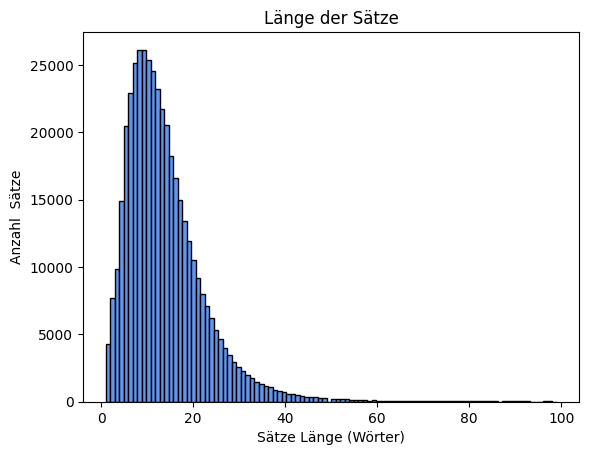

In [26]:
plot_sentence_lengths(df[df["sentence_lenght"] < 100]["sentence_lenght"])

In [14]:
df_temp = df.head(700).sort_values(by="sentence_lenght")
df_temp[df_temp["sentence_lenght"] > 300]

,filename,sentence,start,end,sentence_lemmatized,sentence_compound_split,sentence_id,segment_id,sentence_lenght
534,muenchens-olympiastadion-spinnennetz-und-sensa...,das haben die bayern gut gemacht und der itali...,1169.68,1340.18,das haben die bayern gut gemacht und der itali...,das die Bayer gut Gemach und der Italien Ische...,72,72,344
518,muenchens-olympiastadion-spinnennetz-und-sensa...,es sagte all unseren gästen die zu uns kommen ...,176.18,351.46,es sagte all unseren gästen die zu uns kommen ...,es sagte all Gäste die zu uns kommen Mensch un...,56,56,376
482,muenchens-olympiastadion-spinnennetz-und-sensa...,es sagte all unseren gästen die zu uns kommen ...,176.18,351.46,es sagte all unseren gästen die zu uns kommen ...,es sagte all Gäste die zu uns kommen Mensch un...,20,20,376
528,muenchens-olympiastadion-spinnennetz-und-sensa...,noch monatelang rangen architekten und ingenie...,662.94,834.92,noch monatelang rangen architekten und ingenie...,noch Monat Elan Range Architekt und Ingenieur ...,66,66,392
492,muenchens-olympiastadion-spinnennetz-und-sensa...,noch monatelang rangen architekten und ingenie...,662.94,834.92,noch monatelang rangen architekten und ingenie...,noch Monat Elan Range Architekt und Ingenieur ...,30,30,392
498,muenchens-olympiastadion-spinnennetz-und-sensa...,das haben die bayern gut gemacht und der itali...,1169.68,40.02,das haben die bayern gut gemacht und der itali...,das die Bayer gut Gemach und der Italien Ische...,36,36,415
533,muenchens-olympiastadion-spinnennetz-und-sensa...,vier jahre zuvor in mexico gezeigt hatten frit...,905.84,1169.68,vier jahre zuvor in mexico gezeigt hatten frit...,vier Jahr zuvor in mexico gezeigt hatten Fritz...,71,71,596
497,muenchens-olympiastadion-spinnennetz-und-sensa...,vier jahre zuvor in mexico gezeigt hatten frit...,905.84,1169.68,vier jahre zuvor in mexico gezeigt hatten frit...,vier Jahr zuvor in mexico gezeigt hatten Fritz...,35,35,596


## Anzahl aller Episoden 

In [ ]:
import requests 

GRAPHQL_URL = "https://api.ardaudiothek.de/graphql"
def get_graphql(query):
    response = requests.post(GRAPHQL_URL, json={"query": query})
    if response.status_code == 200:
        return response.json()
    else:
        raise f"GraphQL request failed with status code {response.status_code}"

In [ ]:
query = """
{
	shows: programSets(
    filter:{
      numberOfElements:{
        greaterThanOrEqualTo: 0
      }
    }
  )
  {totalCount}
  
items(filter:{isPublished:{equalTo:true}}){
    totalCount
  }
}
"""

## Alle Autoren (nicht Sprecher)

In [ ]:
query = """
    {
        programSet(id: 5945518) {
        items(
            filter: {
            isPublished: {
                equalTo: true
            }
            }
        ) {
            nodes {
              description
            }
        }
        }
    }
"""

In [ ]:
response = get_graphql(query)

In [ ]:
[print(autor["description"].split("Autorin: ")[-1].split("Autor: ")[-1]) for autor in response["data"]["programSet"]["items"]["nodes"][:10]]

In [ ]:
from tqdm import tqdm
autors = set()

for node in response["data"]["programSet"]["items"]["nodes"]:
    autor = node["description"]
    if "Autor: " in autor or "Autorin: " in autor:
        autor = autor.split("Autorin: ")[-1].split("Autor: ")[-1]
        autor = autor.split("(")[0]
    else:
        autor = ""
    autors.add(autor)

print(len(autors))

## Einzelne Episoden Transkripte analysieren

hey

## Anzahl Nomen herausfinden

In [ ]:
from german_compound_splitter import comp_split
from embedding_creation.embedding_creator_TF_IDF import is_number, compound_split_sentence
from tqdm import tqdm
import os
from dotenv import load_dotenv
import spacy

load_dotenv()
AUDIO_SOURCE_PATH = os.getenv("AUDIO_SOURCE_PATH")
DATA_PATH = os.getenv("DATA_PATH")

In [ ]:
dateipfad = os.path.join(DATA_PATH, "test_data", "vocabulary_compound_split.txt")
nlp = spacy.load("de_core_news_md")

In [ ]:
def sort_words_by_pos(words, sorted_words):
    doc = nlp(" ".join(words))
    
    for token in doc:
        pos = token.pos_
        if pos in sorted_words:
            sorted_words[pos].append(token.text)
        else:
            sorted_words[pos] = [token.text]
    
    return sorted_words

In [ ]:
words = []
with open(dateipfad, 'r', encoding='utf-8') as datei:
    for zeile in tqdm(datei):
        word = zeile.strip()
        words.append(word)

In [ ]:
doc_size = 50_000
sorted_words = {}
for i in tqdm(range(0,len(words), doc_size)):
    sorted_words = sort_words_by_pos(words[i: i+doc_size], sorted_words)


In [ ]:
count = 0
for key in sorted_words.keys():
    print(key, len(sorted_words[key]))
    count += len(sorted_words[key])
print(count)

In [ ]:
(len(sorted_words["NOUN"]) + len(sorted_words["PROPN"])) / count

In [ ]:
sorted_words["INTJ"]

In [ ]:
verbs = sorted(sorted_words["NOUN"], key=len)
print(verbs[-10:])

## Längste Wörter herausfinden

In [ ]:
words = []
with open(dateipfad, 'r', encoding='utf-8') as datei:
    for zeile in tqdm(datei):
        word = zeile.strip()
        words.append(word)

In [ ]:
words[170000:170010]

In [ ]:
long_words = sum(len(s) > 10 for s in words)
print(long_words / len(words))

In [ ]:
doc = nlp(vocab_string)

NUM 1736
ADJ 29240
NOUN 68457
ADV 20331
PROPN 65982
X 2140
PUNCT 27
VERB 15147
ADP 568
AUX 229
DET 674
PART 10
CCONJ 103
PRON 174
SCONJ 16
INTJ 1
204835

## Evaluation Visualisieren

### evaluation topical

In [1]:
import numpy as np
from db_connect import db_get_df
import matplotlib.pyplot as plt

In [54]:
df = db_get_df("evaluation_all")

In [17]:
models = ["VOYAGE", "OPENAI",  "MINI_LM", "TF_IDF"]
metrics = ["Precision","Cohesion", "Uniqueness"]
colors = {'Precision': 'blue', 'Cohesion': 'green', 'Uniqueness': 'red'}


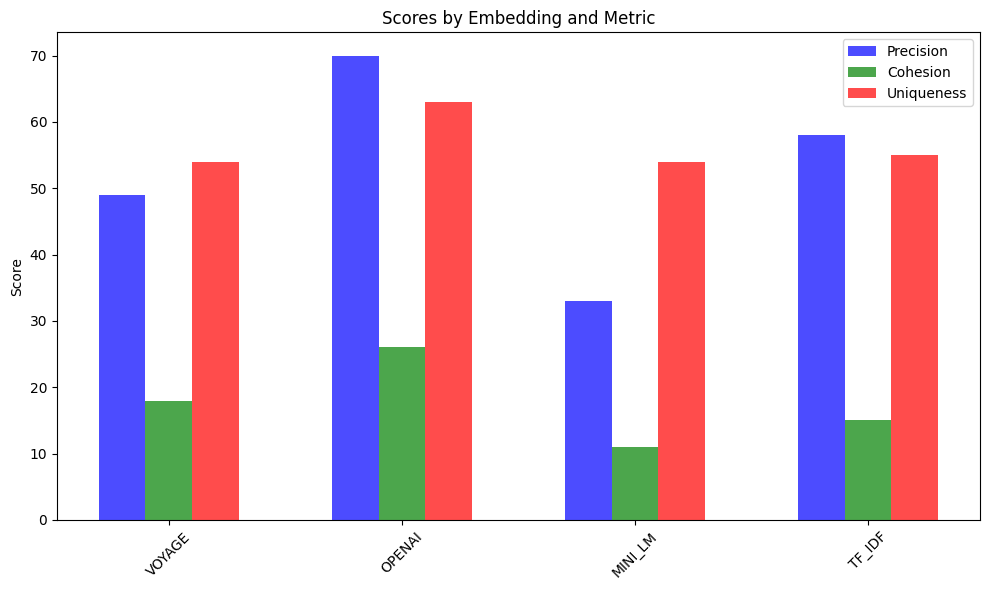

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
for i, metric in enumerate(metrics):
    for j, model in enumerate(models):
        score = df[df["embedding_model"] == model][metric].sum()
        ax.bar(j + i*width, score, width, color=colors[metric], label=metric if j == 0 else "", alpha=0.7)
ax.set_ylabel('Score')
ax.set_title('Scores by Embedding and Metric')
ax.set_xticks(np.arange(len(models)) + width)
ax.set_xticklabels(models)

# ax.set_ylim(0, 1)  # Assuming scores are between 0 and 1
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def plot_prec_lengths(sentence_lengths):
    plt.hist(sentence_lengths, bins=100, color='cornflowerblue', edgecolor='black')
    plt.xlabel('Sätze Länge (Wörter)')
    plt.ylabel('Anzahl  Sätze')
    plt.title('Länge der Sätze')
    plt.show()

#### nach fragen evaluieren

In [18]:
df.dtypes

Reason                object
Precision              int64
Cohesion               int64
Uniqueness             int64
segment_list_json     object
filename_list_json    object
embedding_model       object
query                 object
segment_amount         int64
dtype: object

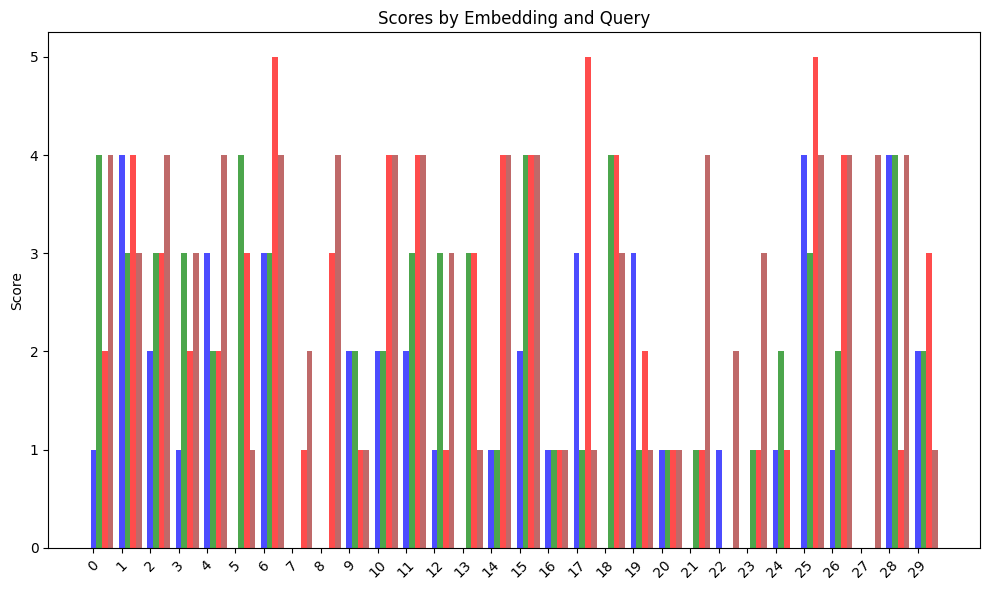

In [42]:
colors = {'VOYAGE': 'blue', 'OPENAI': 'green', 'MINI_LM': 'red', 'TF_IDF': "brown"}

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Width of the bars

# Iterate over models and queries to plot bars
for i, model in enumerate(models):
    for j, query in enumerate(df['query'].unique()):
        score = df[(df["query"] == query) & (df['embedding_model'] == model)]["Precision"].sum()
        ax.bar(i*width + j, score, width, color=colors[model], label=j, alpha=0.7)

# Setting labels and title
ax.set_ylabel('Score')
ax.set_title('Scores by Embedding and Query')
ax.set_xticks(np.arange(30))

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()


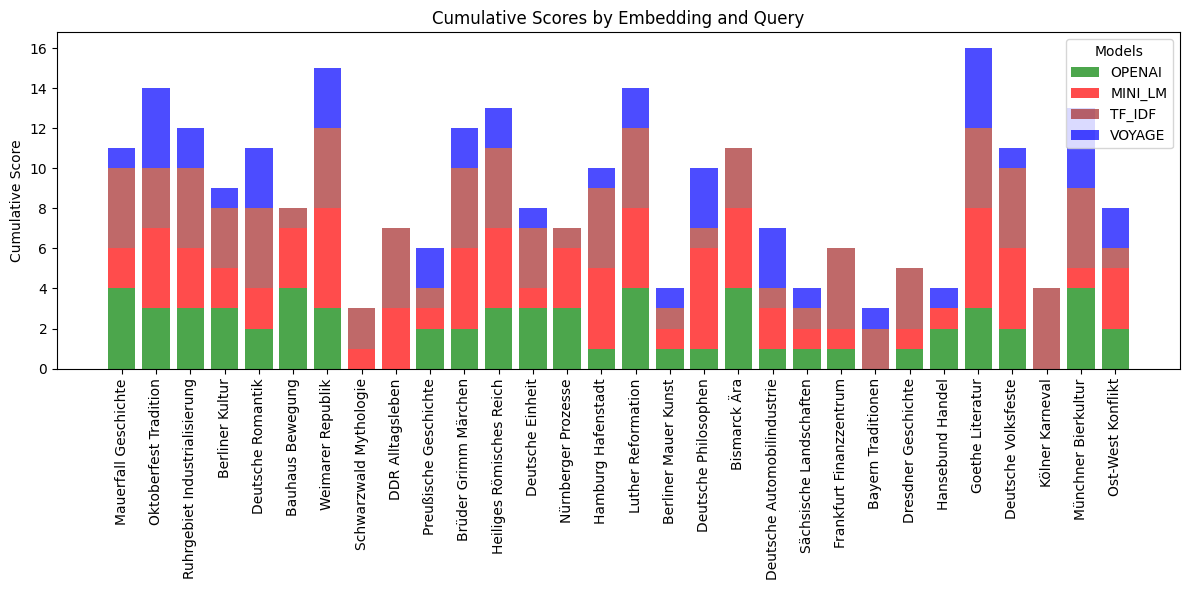

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' and 'models' are predefined
colors = {'VOYAGE': 'blue', 'OPENAI': 'green', 'MINI_LM': 'red', 'TF_IDF': "brown"}

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique queries
queries = df['query'].unique()
n_queries = len(queries)

# Data preparation for cumulative plotting
bottom_scores = np.zeros(n_queries)  # Initialize the bottom for the stacked bars

# Iterate over models and queries to plot bars
for model in models:
    model_scores = [df[(df["query"] == query) & (df['embedding_model'] == model)]["Precision"].sum() for query in queries]
    ax.bar(queries, model_scores, bottom=bottom_scores, color=colors[model], label=model, alpha=0.7)
    bottom_scores += model_scores  # Update the bottom for the next stack

# Setting labels and title
ax.set_ylabel('Cumulative Score')
ax.set_title('Cumulative Scores by Embedding and Query')

# Improve the x-axis labels
plt.xticks(rotation=90)  # Rotate labels to 90 degrees for better visibility

# Add a legend
plt.legend(title="Models")

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


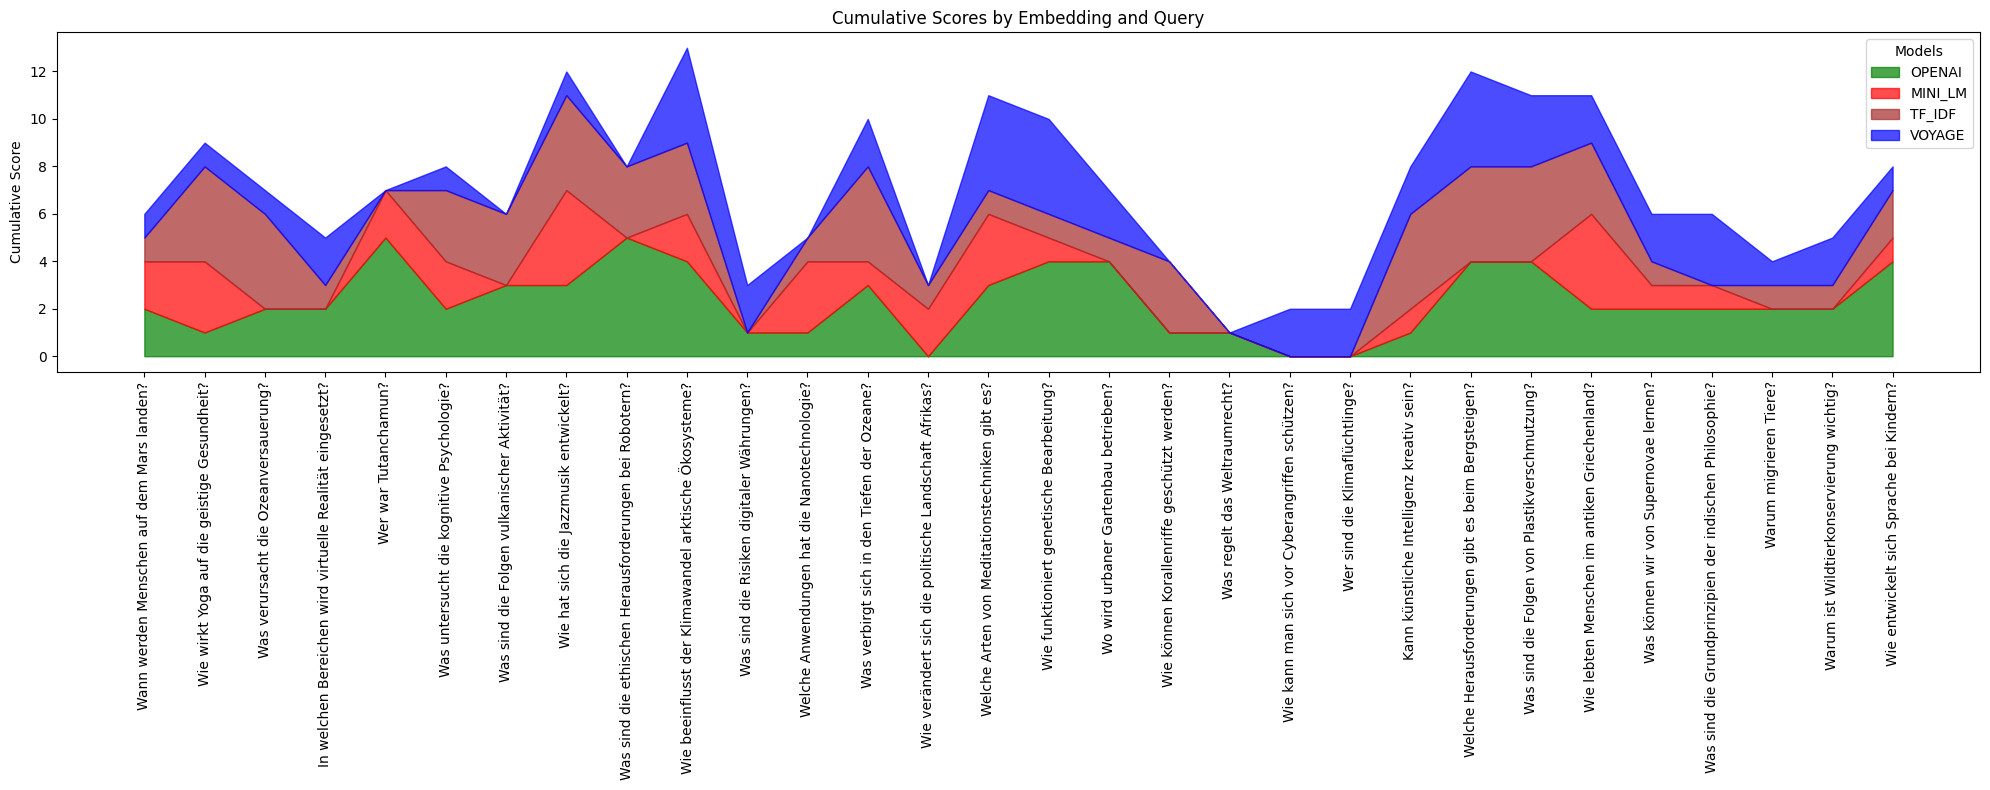

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' and 'models' are predefined
colors = {'VOYAGE': 'blue', 'OPENAI': 'green', 'MINI_LM': 'red', 'TF_IDF': "brown"}

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(20, 8))  # Adjusted figure size for more space

# Get unique queries
queries = df['query'].unique()
n_queries = len(queries)

# Data preparation for cumulative plotting
cumulative_scores = np.zeros(n_queries)

# Iterate over models and queries to plot lines/areas
for model in models:
    model_scores = [df[(df["query"] == query) & (df['embedding_model'] == model)]["Precision"].sum() for query in queries]
    cumulative_scores = np.add(cumulative_scores, model_scores)
    ax.fill_between(queries, cumulative_scores, cumulative_scores - model_scores, color=colors[model], label=model, alpha=0.7)

# Setting labels and title
ax.set_ylabel('Cumulative Score')
ax.set_title('Cumulative Scores by Embedding and Query')
ax.set_xticks(np.arange(len(queries)))
ax.set_xticklabels(queries, rotation=90)  # Rotate labels to 90 degrees

# Add a legend
plt.legend(title="Models")

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


### evaluation re-finding

In [13]:
import numpy as np
from db_connect import db_get_df
import matplotlib.pyplot as plt

In [14]:
df = db_get_df("evaluation_re_finding")

In [4]:
models = ["VOYAGE", "OPENAI",  "MINI_LM", "TF_IDF"]

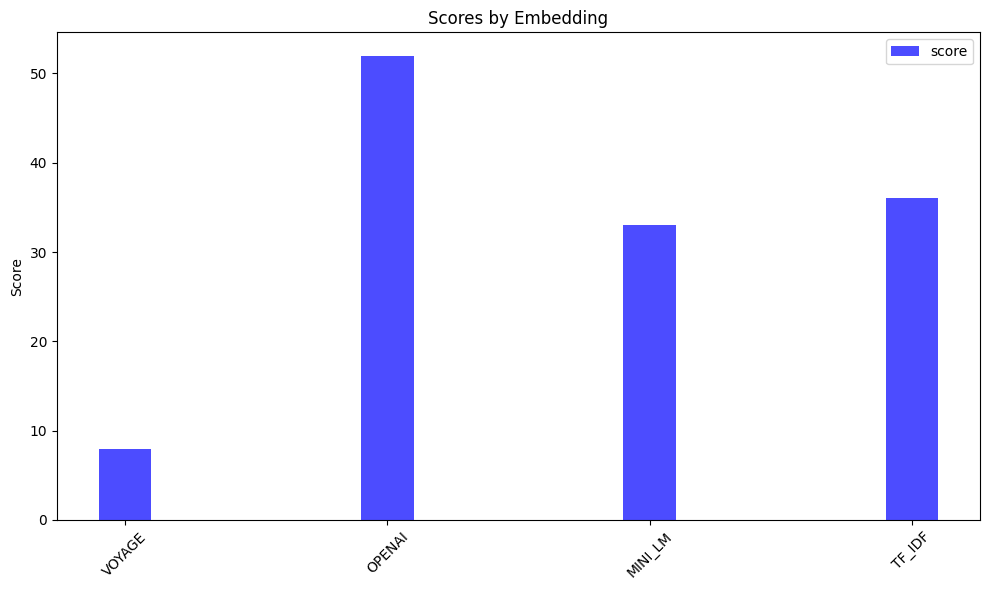

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2

for j, model in enumerate(models):
    score = df[df["model"] == model]["score"].sum()
    ax.bar(j + width, score, width, color="blue", label="score" if j == 0 else "", alpha=0.7)
ax.set_ylabel('Score')
ax.set_title('Scores by Embedding')
ax.set_xticks(np.arange(len(models)) + width)
ax.set_xticklabels(models)

# ax.set_ylim(0, 1)  # Assuming scores are between 0 and 1
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()